In [477]:
# This program compute the minimal GKZ vector associated to a point-configuration
# input: point-configuration A
# output: 

In [478]:
reset()

In [479]:
#from sage.geometry.polyhedron.constructor import Polyhedron
#from sage.numerical.optimize import minimize_constrained
# P.volume()
import sage.rings.rational as rational

In [480]:
A = [[0,0], [1,2], [2,1], [17,9]] # point-configuration

# mather example [4,0,0], [0,4,0], [0,0,4], [2,1,1], [1,2,1], [1,1,2]
# Naoto's five points [0,0], [1,0], [2,0], [1,1], [0,1]
# skew four points [0,0], [1,2], [2,1], [17,9]
Ap = PointConfiguration(A)
N = len(A) # 点的个数
n = len(A[0]) # 维数

In [481]:
print("点的个数:", N)

点的个数: 4


In [482]:
SP = Ap.secondary_polytope()

In [483]:
#SP.Vrepresentation()

In [484]:
# SP.Hrepresentation()

In [485]:
f = lambda x, i=i: sum(x[i]**2 for i in range(N)) # 目标函数 向量模平方

In [486]:
# for using Mathematica
# Ae = [eq[0:] for eq in SP.equations()]
# Ai = [ineq[0:] for ineq in SP.inequalities()]
# Ae

In [487]:
# Ai

In [488]:
# 提取SP的约束不等式的系数
B = [eq[1:] for eq in SP.equations()]  # 提取 等式约束的x系数
b = [eq[0] for eq in SP.equations()]  # 提取 等式约束的常数项
G = [ineq[1:] for ineq in SP.inequalities()]  # 提取 不等式约束的x系数
g = [ineq[0] for ineq in SP.inequalities()]  # 提取 不等式约束的常数项

In [489]:
# 定义约束条件
cons = []
for i in range(len(B)):
    cons.append(lambda x, i=i: b[i]+sum(B[i][j] * x[j] for j in range(N)))
for i in range(len(B)):
    cons.append(lambda x, i=i: -b[i]-sum(B[i][j] * x[j] for j in range(N)))
for i in range(len(G)):
    cons.append(lambda x, i=i: g[i]+sum(G[i][j] * x[j] for j in range(N)))

In [490]:
# 取 SP 的第一个顶点为初始点
init = list(SP.vertices()[1]) 

In [491]:
# 求解优化问题
mGKZ = minimize_constrained(f, cons, init)
# algorithm="SLSQP"  多面体的约束由线性等式和不等式组成
# algorithm="trust-constr" 高维问题或多面体有大量的约束（稀疏约束矩阵）

print("最小GKZ向量:", mGKZ)

最小GKZ向量: (13.631913499227885, 25.53774289133791, 14.44357228344795, 24.386771325986246)


In [492]:
# 计算 mGKZ 的 lower convex envelop
liftA = [a + [b] for a, b in zip(A, mGKZ)]
liftA

[[0, 0, 13.631913499227885],
 [1, 2, 25.53774289133791],
 [2, 1, 14.44357228344795],
 [17, 9, 24.386771325986246]]

In [493]:
liftQ = Polyhedron(liftA)
HLQ = liftQ.Hrepresentation()
HLQ

(An inequality (3.426528949, -7.667641661, 1.0) x - 13.62898852 >= 0,
 An inequality (-3.44992881, 7.7115164, -1.0) x + 13.6319135 >= 0,
 An inequality (-3.425709954, 7.665769672, -1.0) x + 13.6319135 >= 0,
 An inequality (3.427503943, -7.666666667, 1.0) x - 13.6319135 >= 0)

In [494]:
lowHLQ = [ineq for ineq in HLQ if ineq[n+1] > 0]
lowHLQ

[An inequality (3.426528949, -7.667641661, 1.0) x - 13.62898852 >= 0,
 An inequality (3.427503943, -7.666666667, 1.0) x - 13.6319135 >= 0]

In [495]:
F1 = liftQ.plot(axes=True)
F2 = point3d(liftA, color='red', size=60)
F3 = F1 + F2

# 显示结果
F3.show()

Graphics3d Object

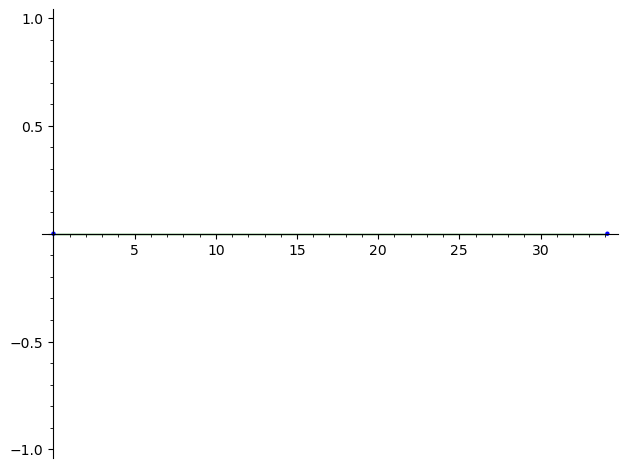

In [496]:
SP.show(axes=True)